# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.106423e+01     7.157945e+00
 * time: 0.00440216064453125
     1     2.845342e+01     5.596214e+00
 * time: 0.01985621452331543
     2     2.098563e+01     6.245984e+00
 * time: 0.08960700035095215
     3     1.536936e+01     4.751291e+00
 * time: 0.10488009452819824
     4     1.155835e+01     2.485802e+00
 * time: 0.12030816078186035
     5     1.127699e+01     3.357834e+00
 * time: 0.13264918327331543
     6     1.014225e+01     1.732672e+00
 * time: 0.14512920379638672
     7     9.296676e+00     1.724525e+00
 * time: 0.15733122825622559
     8     8.779362e+00     1.547566e+00
 * time: 0.169450044631958
     9     8.539733e+00     1.059152e+00
 * time: 0.181793212890625
    10     8.366980e+00     8.444771e-01
 * time: 0.19420313835144043
    11     8.196449e+00     7.684095e-01
 * time: 0.20708513259887695
    12     8.064122e+00     3.478094e-01
 * time: 0.21990418434143066
    13     8.017031e+00     5.803343e-01
 * time: 0.2

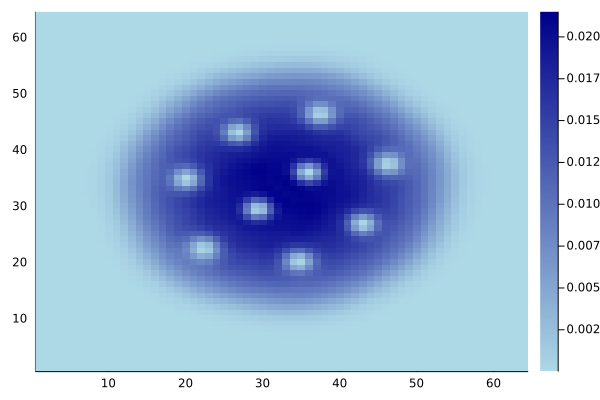

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)